In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re

In [2]:
submissions_level0 = [("Optimization Short", "level_3_comparison/optimal/submission.csv"), ("Optimization Long", "level_3_comparison/optimal/submission.csv"), ("RL Slow", "/home/tim/code/rl_experiments/lsy_drone_racing_rl/Documentation/version_more_noise/somewhat slower solution/level_3/submission.csv"), ("RL Fast", "/home/tim/code/rl_experiments/lsy_drone_racing_rl/Documentation/version_more_noise/level3/submission.csv")]

def read_file(path):
    times = []
    data = {}
    with open(path) as f:
        # exta for first rows
        for i in range(3):
            line = f.readline()
            if i in [0, 1]:
                parts = line.split(", ")
                parts = [p.strip() for p in parts]
                for part in parts:
                    key, value = part.split(":")
                    data[key] = float(value)
                
        for line in f:
            line = line.split(",")
            times.append(float(line[1]))
    return np.array(times), data



In [3]:
def create_violin_plot(ax, exps, title, baseline, no_yticks=False):
    names = [exp[0] for exp in exps]
    exps = [exp[1] for exp in exps]
    times = [exp[0] for exp in exps]
    success_rates = [exp[1]["success_rate"] for exp in exps]
    ax.set_title(title)
    parts = ax.violinplot(times, showmeans=True, showmedians=False)

    # add gray line y = baseline for baseline
    ax.axhline(y=baseline, color='gray', linestyle='--')
    # add label baseline below baseline line such that leftbound but inside plot
    if not no_yticks:
        ax.text(0.02, baseline - 0.05, 'Baseline', color='gray', ha='left', va='top', transform=ax.get_yaxis_transform())


    # Define a colormap
    cmap = plt.cm.viridis
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(cmap(success_rates[i]))
        pc.set_edgecolor(cmap(success_rates[i]))  # Optionally, set edge color to black
        pc.set_alpha(0.7)  # Adjust transparency if needed

    # Update the colors for the means and medians
    for partname in ('cbars', 'cmeans', 'cmaxes', 'cmins'):
        vp = parts[partname]
        vp.set_edgecolor('black')

    labels = names
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.tick_params(axis='x', which='both', bottom=False, top=False) # remove ticks

    if no_yticks:
        ax.set_yticks([])



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


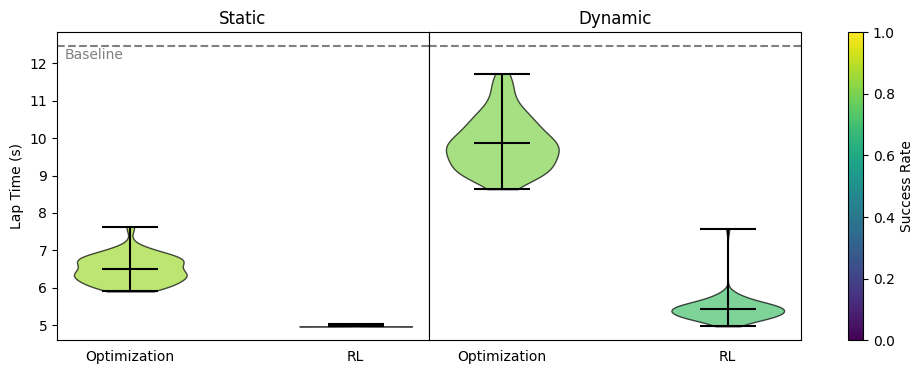

In [6]:

submissions_level0 = [("Optimization", "/home/tim/code/lsy_drone_racing/documentation/level_1_comparison/optimal/submission.csv"), ("RL", "/home/tim/code/rl_experiments/lsy_drone_racing_rl/Documentation/version_more_noise/new_best_solution/submission_level_0.csv")]
submissions_level3 = [("Optimization", "level_3_comparison/optimal/submission.csv"), ("RL", "/home/tim/code/rl_experiments/lsy_drone_racing_rl/Documentation/version_more_noise/new_best_solution/submission.csv")]

exps_level0 = [(name, read_file(path)) for name, path in submissions_level0]
exps_level3 = [(name, read_file(path)) for name, path in submissions_level3]

# create subplots
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[:, :2])
ax2 = plt.subplot(gs[:, 2:])

#fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
create_violin_plot(ax1, exps_level0, "Static", 12.46)
ax1.set_ylabel("Lap Time (s)")
create_violin_plot(ax2, exps_level3, "Disturbed", 12.46, no_yticks=True)

fig.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0, 1), cmap=plt.cm.viridis), ax=[ax1, ax2], label='Success Rate')


out_path = "/home/tim/code/lsy_drone_racing/documentation/violinplot.eps"
plt.savefig(out_path, format='eps', bbox_inches='tight')



# # create violinplot for each submission
# fig = plt.figure(figsize=(8, 4))
# ax1 = fig.add_subplot(111) 
# parts = ax1.violinplot([exp[0] for exp in exps], showmeans=True, showmedians=True)



# # Normalize success rates to [0, 1] for colormap
# norm = plt.Normalize(0, 1)

# success_rates = [exp[1]["success_rate"] for exp in exps]
# for i, pc in enumerate(parts['bodies']):
#     pc.set_facecolor(cmap(norm(success_rates[i])))
#     pc.set_edgecolor('black')  # Optionally, set edge color to black
#     pc.set_alpha(0.7)  # Adjust transparency if needed

# # Update the colors for the means and medians
# for partname in ('cbars', 'cmeans', 'cmedians'):
#     vp = parts[partname]
#     vp.set_edgecolor('black')

# # get the labels
# labels = [label for label, _ in submissions]
# plt.xticks(range(1, len(labels) + 1), labels)
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1, label='Success Rate')

# plt.ylabel("Time (s)")


